# 1. Objective
* I tried to find how I can classify 6 patterns which includes 'No Failure', 'Power Failure', 'Tool Wear Failure','Overstrain Failure', 'Random Failures', 'Heat Dissipation Failure'.

# 2. Insight
* By PyCaret, I found that Decision Tree Classifier may be the best. So I used it for prediction model.
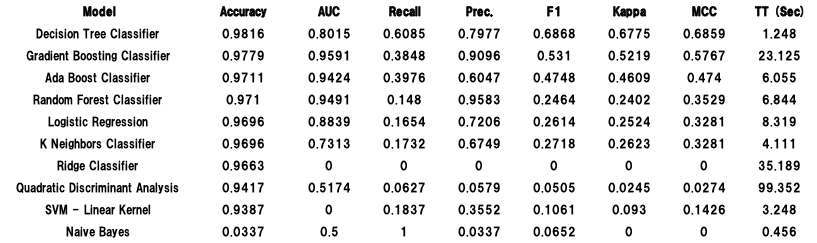!

* First, I tried the Binary classification　in which I can classify 'Failure' or 'No Failure' and its accuracy is 98.1%

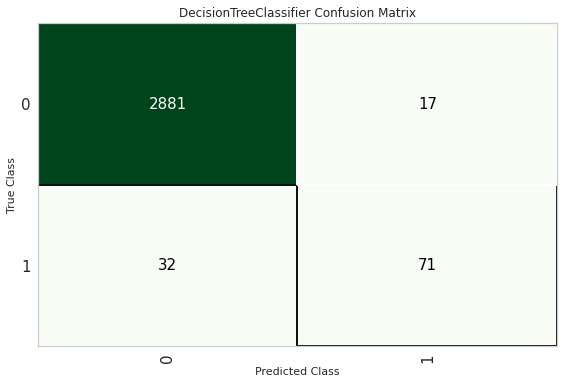


* Next, I tried the multiple classification in which I can classify 6 patterns which includes 'No Failure', 'Power Failure', 'Tool Wear Failure','Overstrain Failure', 'Random Failures','Heat Dissipation Failure'.

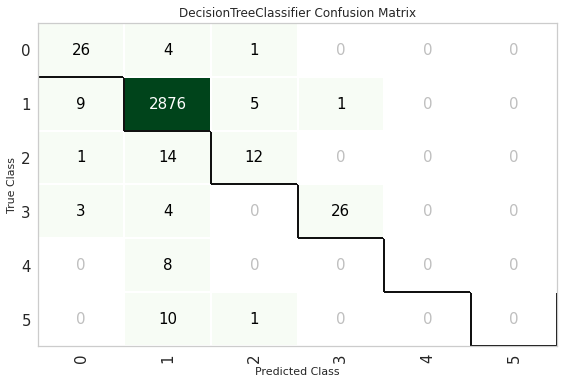

* In multiple classification model, I got 97.8% accuracy. In each classes, there are some difference about what the important factoers is.

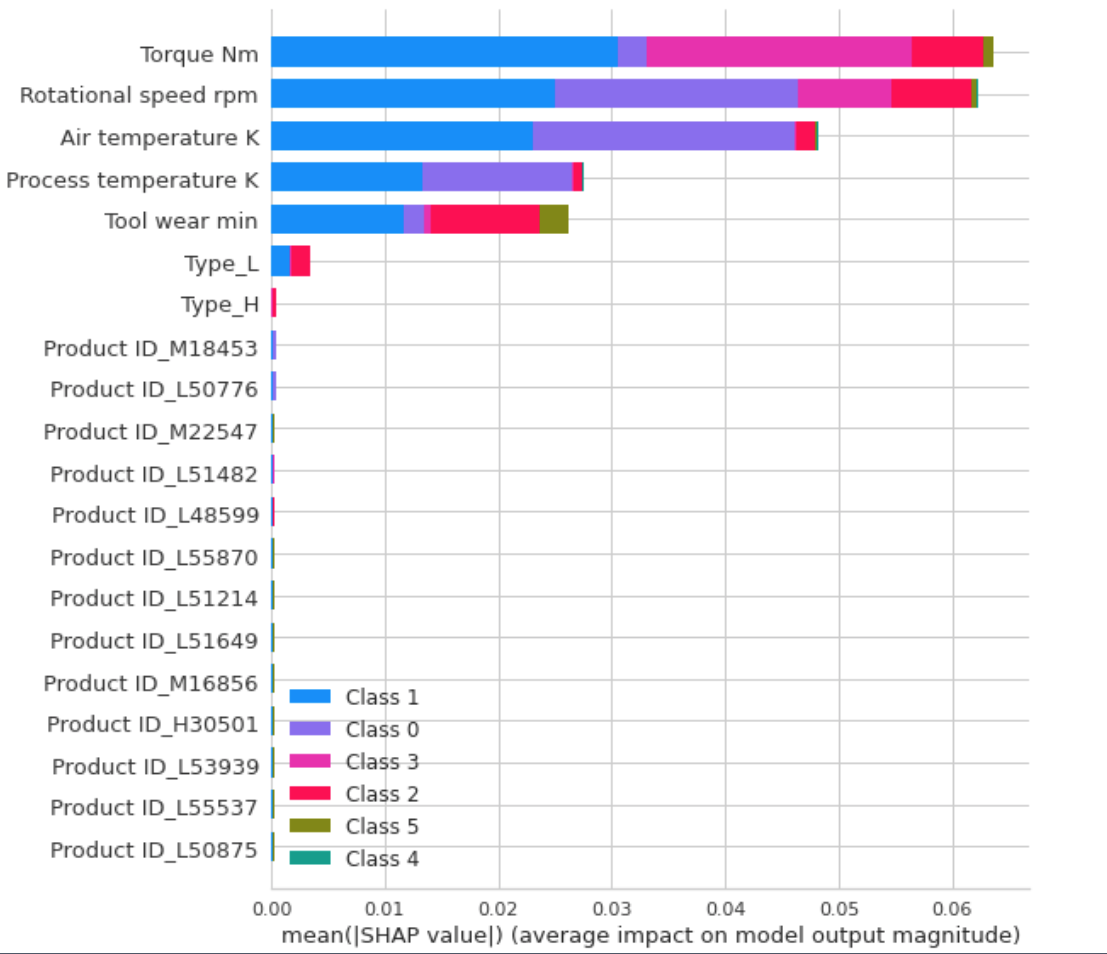

Let's go into the details.

1) Data Preprocessing

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df['Type'].unique()

In [ ]:
df['Failure Type'].unique()

In [ ]:
df['Target'].unique()

2) Visualization

In [ ]:
df.groupby('Failure Type')['UDI'].count().plot.bar()

In [ ]:
df.groupby(['Type','Failure Type'])['UDI'].count().plot.bar()

In [ ]:
df.groupby('Failure Type')['Air temperature [K]'].mean().plot.bar()

In [ ]:
df.groupby('Failure Type')['Process temperature [K]'].mean().plot.bar()

In [ ]:
df.groupby('Failure Type')['Rotational speed [rpm]'].mean().plot.bar()

In [ ]:
df.groupby('Failure Type')['Torque [Nm]'].mean().plot.bar()

In [ ]:
df.groupby('Failure Type')['Tool wear [min]'].mean().plot.bar()

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, fmt="1.1f")

3) Classification by PyCaret

In [ ]:
pip install pycaret --ignore-installed llvmlite numba

In [ ]:
from pycaret.classification import *

In [ ]:
df1=df.drop(['Failure Type'],axis=1)

In [ ]:
exp_clf = setup(df1, target = 'Target',silent=True,session_id=1)

In [ ]:
dt = create_model('dt')

In [ ]:
plot_model(dt)

In [ ]:
plot_model(dt, plot = 'confusion_matrix') 

In [ ]:
interpret_model(dt)

In [ ]:
df1=df.drop('Target', axis=1)

In [ ]:
exp_clf2 = setup(df1, target = 'Failure Type',silent=True,session_id=1)

In [ ]:
dt = create_model('dt')

In [ ]:
plot_model(dt)

In [ ]:
plot_model(dt, plot = 'confusion_matrix') 

In [ ]:
interpret_model(dt)